# Assignment 6 Fraud Check - Decision Trees

# Introduction:

### What is a Decision Tree?

######  Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. 
###### It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
######  In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
###### The decisions or the test are performed on the basis of features of the given dataset.
###### It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
###### It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
###### In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
###### A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.




# Use Decision Trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### About Dataset


###### Undergrad : person is under graduated or not
###### Marital.Status : marital status of a person
###### Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
###### Work Experience : Work experience of an individual person
###### Urban : Whether that person belongs to urban area or not

In [97]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV,  StratifiedKFold, cross_val_score, train_test_split
import warnings
warnings.filterwarnings('ignore')

%config IPCompleter.greedy=True

In [98]:
df = pd.read_csv("Fraud_check.csv")

In [99]:
#Viewing top 5 rows of dataframe
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [100]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


#### Data Exploration
###### Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [101]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [102]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# Descriptive Analysis

In [103]:
df.shape

(600, 6)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [105]:
df[df.duplicated()].shape

(0, 6)

In [106]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [107]:
df.describe()
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


###### The features are not on the same scale. For example City.Population has a mean of 108747.36 while Work.Experience has a mean value of 15.55. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly.

# Feature Engineering

In [108]:
categorical_features = df.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

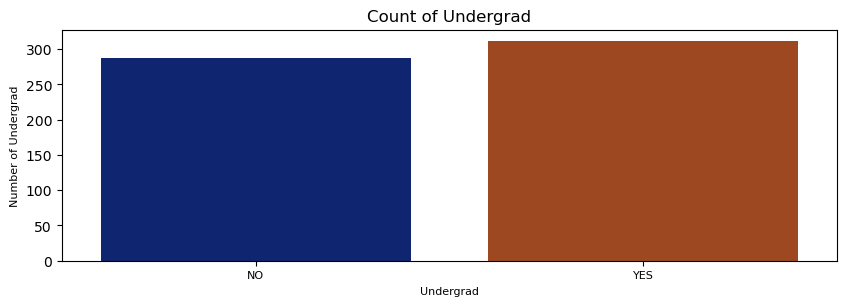

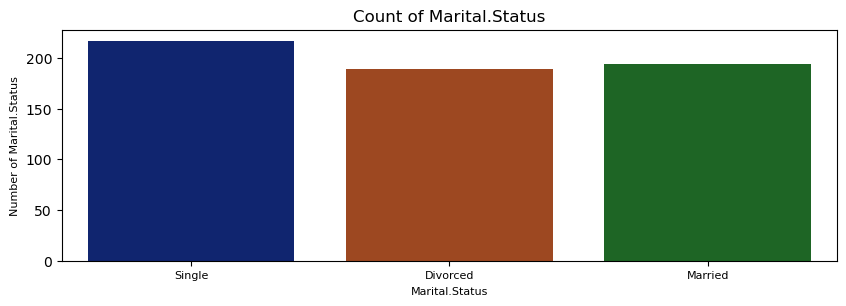

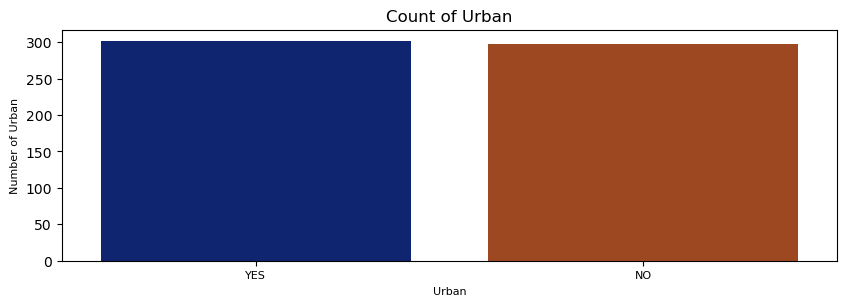

In [109]:
for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(10, 3))
    unique = df[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=df, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 8)
    
    plt.xlabel(column, fontsize=8)
    plt.ylabel("Number of "+ column, fontsize=8)

In [110]:
numerical_features = df.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

In [111]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,False,False,True,True
1,33700,134075,18,True,False,False,True
2,36925,160205,30,False,True,False,True
3,50190,193264,15,True,False,True,True
4,81002,27533,28,False,True,False,False
...,...,...,...,...,...,...,...
595,76340,39492,7,True,False,False,True
596,69967,55369,2,True,False,False,True
597,47334,154058,0,False,False,False,True
598,98592,180083,17,True,True,False,False


In [112]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [9000,30000,100000] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [113]:
#After creation of new col. TaxInc also made its dummies .
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)
df = df.astype(int)

In [114]:
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


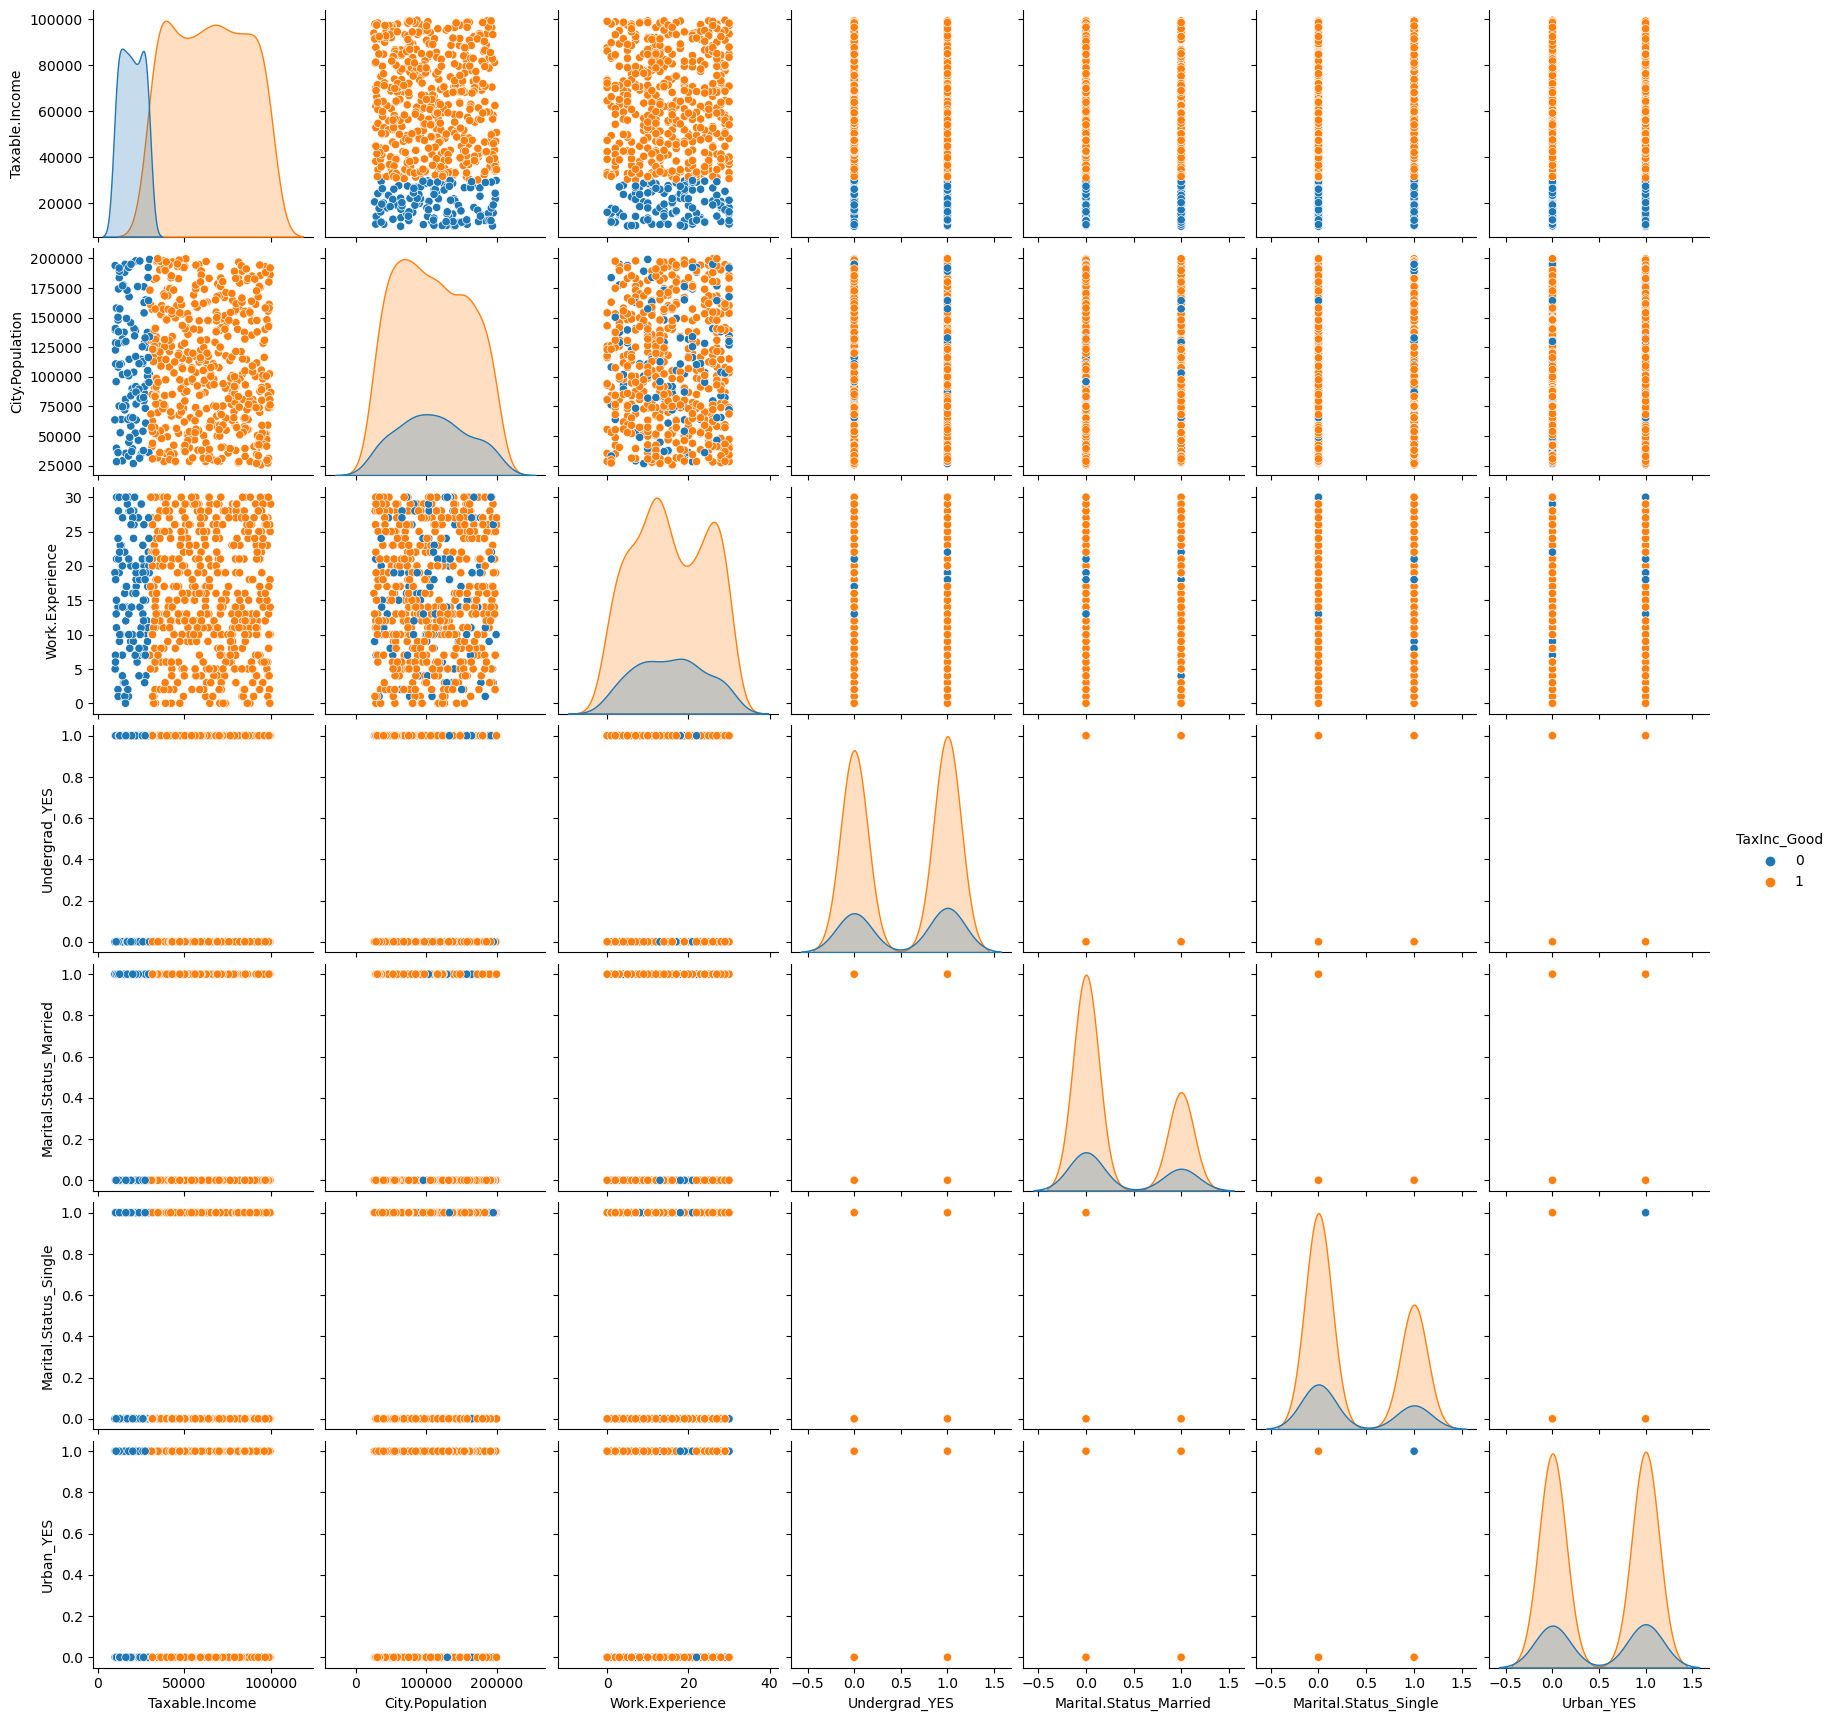

In [115]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [116]:
#Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# def norm_func(i):
#     if not pd.api.types.is_numeric_dtype(i):
#         print(i)
#         # Handle non-numeric values or NaNs here
#         # For example, you can print a message and return the original data
#         print("Non-numeric data detected. Skipping normalization.")
#         return i

#     x = (i - i.min()) / (i.max() - i.min())
#     return x

In [117]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


# Lets assume: taxable_income <= 30000 as “Risky” and others are “Good”

In [118]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [119]:
df_norm.rename(columns={"Undergrad_YES":"undergrad","Marital.Status_Single":"single","Marital.Status_Married":"marital","City.Population":"population","Work.Experience":"experience","Urban_YES":"urban","TaxInc_Good":"TaxableIncome"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode
df_norm

,population,experience,undergrad,marital,single,urban,TaxableIncome,income
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0,Good
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0,Good
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0,Good
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0,Good
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0,Good
...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0,Good
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0,Good
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0,Good
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0,Good


### Checking for Imbalanced or balanced dataset with regards to the Target

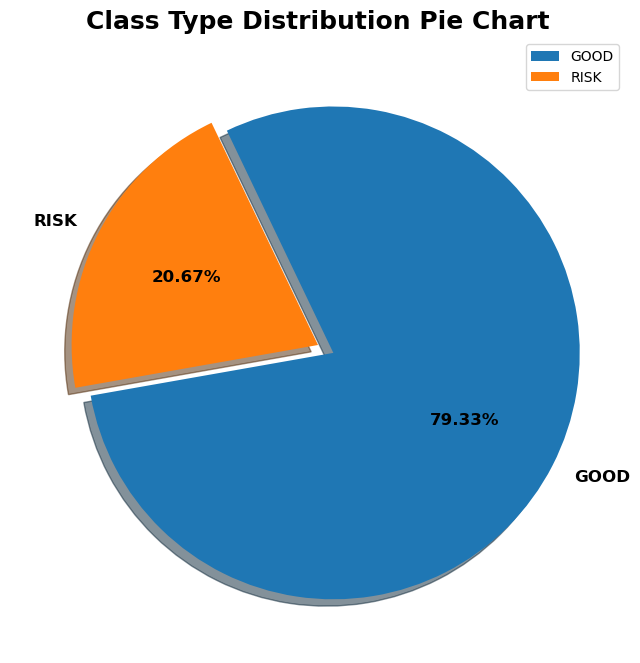

In [120]:
import matplotlib.pyplot as plt

# Magic Numbers
explode_values = [0.07, 0.0]
label_values=["GOOD","RISK"]
plt.figure(figsize=(12, 8))

plt.pie(df_norm["income"].value_counts(),
        labels=label_values,
        explode=explode_values,
        autopct='%.2f%%',
        shadow=True,
        startangle=190,
        textprops={'size': 'large',
                   'fontweight': 'bold',
                   'color': 'black'})

# Legend placement corrected
plt.legend(loc='upper right')

plt.title("Class Type Distribution Pie Chart", fontsize=18, fontweight='bold')

plt.show()


Text(0.5, 1.0, 'Risky or Good for Individual Taxable Income ')

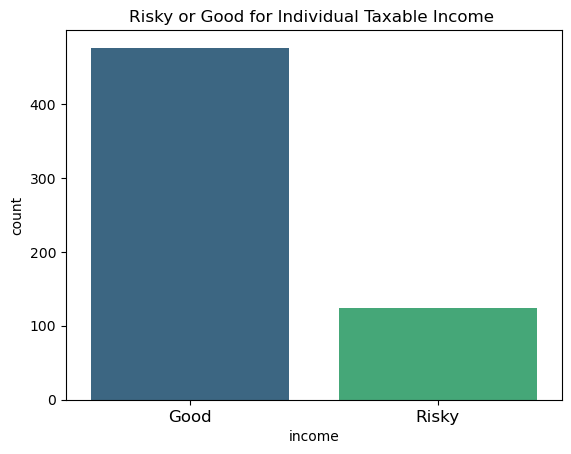

In [121]:
label_values=["GOOD","RISK"]
sns.countplot(x='income', data=df_norm, palette = 'viridis', 
              order=df_norm['income'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')

#### Here datasets is imbalanced as we can see above the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.
#### Here, the class “Good” is called the majority class, and the much smaller in size “Risky” class is called the minority class.

### Test Train Split With Imbalanced Dataset
##### *Train Test Split* : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

 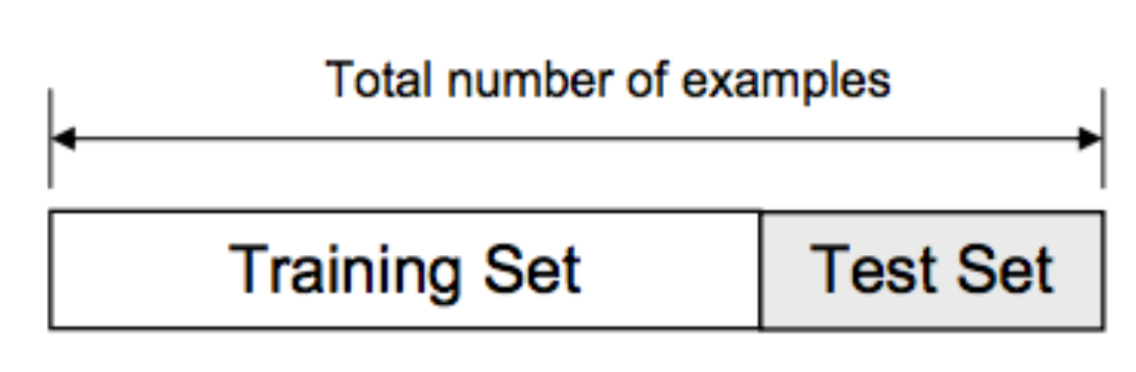

####  *Cross Validation*: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

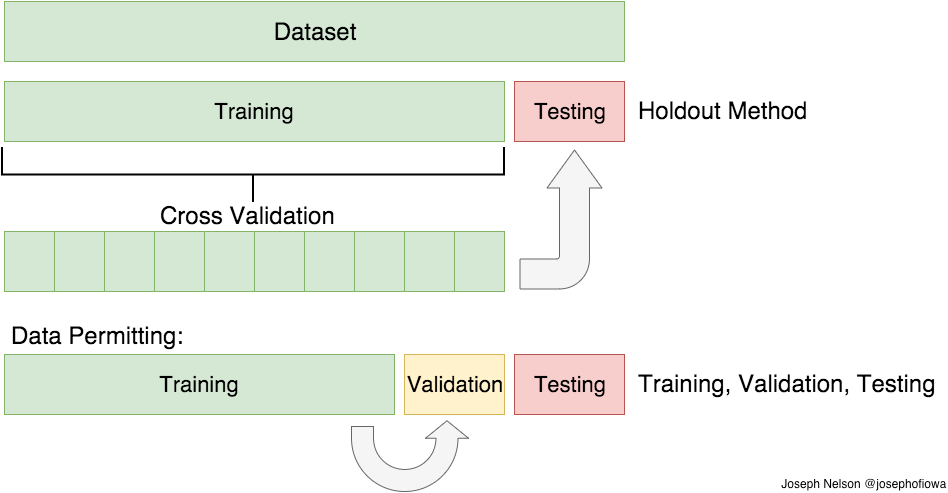

# *About Stratify* :
######  Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
###### For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

######  In machine learning, When we want to train our ML model we split our entire dataset into training_set and test_set using train_test_split() class present in sklearn. Then we train our model on training_set and test our model on test_set. The problems that we are going to face in this method are:

######  Whenever we change the random_state parameter present in train_test_split(), We get different accuracy for different random_state and hence we can’t exactly point out the accuracy for our model. The train_test_split() splits the dataset into training_test and test_set by random sampling. But stratified sampling is performed.

######  What are random sampling and Stratified sampling? Suppose you want to take a survey and decided to call 1000 people from a particular state, If you pick either 1000 males completely or 1000 females completely or 900 females and 100 males (randomly) to ask their opinion on a particular product. Then based on these 1000 opinions you can’t decide the opinion of that entire state on your product. This is random sampling. But in Stratified Sampling, Let the population for that state be 51.3% male and 48.7% female, Then for choosing 1000 people from that state if you pick 513 male ( 51.3% of 1000 ) and 487 female ( 48.7% for 1000 ) i.e 513 male + 487 female (Total=1000 people) to ask their opinion. Then these groups of people represent the entire state. This is called Stratified Sampling.

######  Why random sampling is not preferred in machine learning? Let’s consider a binary-class classification problem. Let our dataset consists of 100 samples out of which 80 are negative class { 0 } and 20 are positive class { 1 }.

######  Random sampling: If we do random sampling to split the dataset into training_set and test_set in an 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

######  Stratified Sampling: In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

######  What is the solution to mentioned problems? The solution for the first problem where we were able to get different accuracy scores for different random_state parameter values is to use K-Fold Cross-Validation. But K-Fold Cross Validation also suffers from the second problem i.e. random sampling. The solution for both the first and second problems is to use Stratified K-Fold Cross-Validation.

######  What is Stratified K-Fold Cross Validation? Stratified k-fold cross-validation is the same as just k-fold cross-validation, But Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

In [122]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df_norm.columns:
    df_norm[column_name] = le.fit_transform(df_norm[column_name])
   

In [123]:
##Splitting the data into featuers and labels
features = df_norm.iloc[:,0:6]
labels = df_norm.iloc[:,7]

In [124]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(features, labels):
# select rows
    train_X, test_X = features.iloc[train_ix], features.loc[test_ix]
    train_y, test_y = labels.iloc[train_ix], labels.iloc[test_ix]
# summarize train and test composition
    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))

>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13


In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

# Building Decision Tree Classifier using Entropy Criteria

In [126]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [127]:
colnames = list(df_norm.columns)
colnames

['population',
 'experience',
 'undergrad',
 'marital',
 'single',
 'urban',
 'TaxableIncome',
 'income']

### General structure of a decision tree:
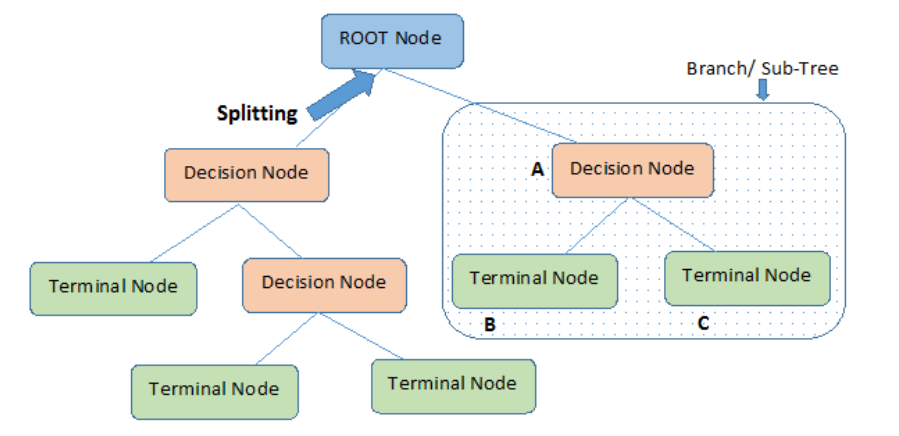
##### Before learning more about decision trees let’s get familiar with some of the terminologies.
<b>Root Nodes</b>  `It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.`

<b>Decision Nodes</b> - `the nodes we get after splitting the root nodes are called Decision Node`

<b>Leaf Nodes</b>- `Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.`

<b>Branch/Sub-tree</b> - `just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.`

<b>Pruning</b> - `is nothing but cutting down some nodes to stop overfitting.`

<b>Splitting</b> -  `Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.`

<b>Pruning</b> - `Pruning is the process of removing the unwanted branches from the tree`

<b>Parent/Child node</b> - `The root node of the tree is called the parent node, and other nodes are called the child nodes.`

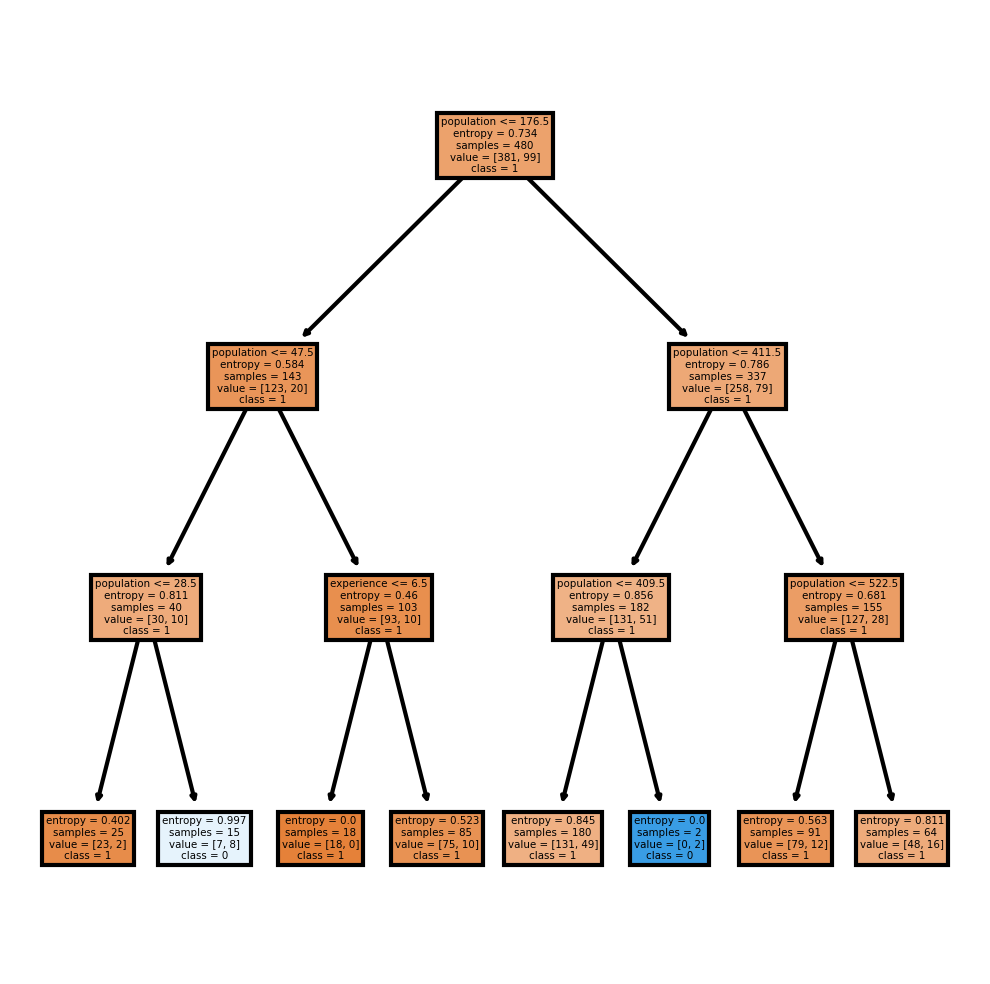

In [128]:
fn=['population','experience','undergrad','marital','single','urban']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [129]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    116
1      4
Name: count, dtype: int64

In [130]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [131]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
income,,
0,91,4
1,25,0


In [132]:
# Accuracy 
np.mean(preds==y_test)

0.7583333333333333

In [133]:
y_predict = model.predict(x_test)

In [134]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )


Accuracy :  75.83333333333333


In [135]:
print(confusion_matrix(y_test,y_predict))

[[91  4]
 [25  0]]


In [136]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        95
           1       0.00      0.00      0.00        25

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.62      0.76      0.68       120



In [137]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 79.38%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.793750   0.0   0.79375    0.396875      0.630039
recall       1.000000   0.0   0.79375    0.500000      0.793750
f1-score     0.885017   0.0   0.79375    0.442509      0.702483
support    381.000000  99.0   0.79375  480.000000    480.000000
_______________________________________________
Confusion Matrix: 
 [[381   0]
 [ 99   0]]

Test Result:
Accuracy Score: 79.17%
_______________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy   macro avg  weighted avg
precision   0.791667   0.0  0.791667    0.395833      0.626736
recall      1.000000   0.0  0.791667    0.500000      0.7